# EJERCICIOS EN COMPUTADORA

In [3]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wooldridge import data
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

## Problema 2

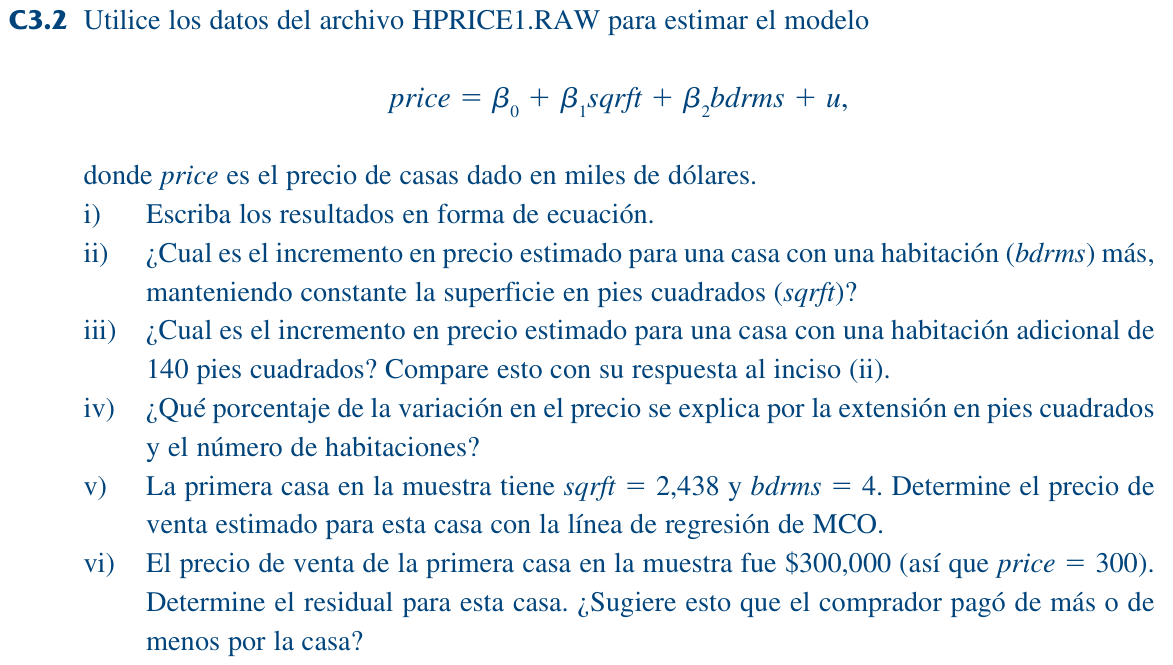

In [15]:
# Ejercicio C3.2
# Cargar los datos HPRICE1.RAW
data_hprice1 = data('hprice1')
data_hprice1.head()

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.100006,4,6126.0,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.500000,3,9903.0,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.699997,3,5200.0,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.800003,3,4600.0,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.100006,4,6095.0,2514,1,5.921578,5.765504,8.715224,7.829630


### Parte I

In [16]:
# Modelo: price = b0 + b1*sqrft + b2*bdrms + u
X = data_hprice1[['sqrft', 'bdrms']]
X = sm.add_constant(X)
y = data_hprice1['price']

# Estimación del modelo
model_hprice = sm.OLS(y, X).fit()

# Resultados
print("\nResultados del modelo HPRICE1:")
print(model_hprice.summary())


Resultados del modelo HPRICE1:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     72.96
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           3.57e-19
Time:                        14:49:13   Log-Likelihood:                -488.00
No. Observations:                  88   AIC:                             982.0
Df Residuals:                      85   BIC:                             989.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.315

In [17]:
# Parte i: Escribir los resultados en forma de ecuación
b0 = model_hprice.params['const']
b1 = model_hprice.params['sqrft']
b2 = model_hprice.params['bdrms']
ecuacion = f"price = {b0:.2f} + {b1:.4f}*sqrft + {b2:.4f}*bdrms"
print(f"\nEcuación estimada: {ecuacion}")


Ecuación estimada: price = -19.31 + 0.1284*sqrft + 15.1982*bdrms


### Parte II

In [18]:
# Parte ii: Incremento en precio por una habitación adicional manteniendo sqrft constante
incremento_bdrms = b2
print(f"Incremento estimado en el precio por una habitación adicional: {incremento_bdrms:.2f} mil dólares")

Incremento estimado en el precio por una habitación adicional: 15.20 mil dólares


### Parte III

In [19]:
# Parte iii: Incremento en precio por una habitación adicional de 140 pies cuadrados
incremento_total = b2 + 140 * b1
print(f"Incremento estimado en el precio por una habitación adicional de 140 pies cuadrados: {incremento_total:.2f} mil dólares")

Incremento estimado en el precio por una habitación adicional de 140 pies cuadrados: 33.18 mil dólares


### Parte IV

In [20]:
# Parte iv: Porcentaje de la variación explicada (R-cuadrada)
r_squared = model_hprice.rsquared
print(f"Porcentaje de variación en el precio explicado: {r_squared*100:.2f}%")

Porcentaje de variación en el precio explicado: 63.19%


### Parte V

In [21]:
# Parte v: Precio estimado para la primera casa
sqrft_1 = 2438
bdrms_1 = 4
precio_estimado = b0 + b1 * sqrft_1 + b2 * bdrms_1
print(f"Precio estimado para la primera casa: {precio_estimado:.2f} mil dólares")

Precio estimado para la primera casa: 354.61 mil dólares


### Parte VI

In [22]:
# Parte vi: Residual para la primera casa
precio_real = 300
residual = precio_real - precio_estimado
if residual > 0:
    print(f"\nEl comprador pagó de más por la casa en {residual:.2f} mil dólares")
else:
    print(f"\nEl comprador pagó de menos por la casa en {abs(residual):.2f} mil dólares")


El comprador pagó de menos por la casa en 54.61 mil dólares
